In [1]:
import os 
import numpy as np 
import pandas as pd

In [2]:
data_folder = os.path.join(os.path.expanduser("~"),"Datamining","ch5", "Data","Ads")

In [3]:
data_filename = os.path.join(data_folder, "ad.data")

In [4]:
data_filename

'C:\\Users\\abhijit\\Datamining\\ch5\\Data\\Ads\\ad.data'

In [5]:
def convert_number(x):
    try:
        return float(x) 
    except ValueError:
        return np.nan

In [6]:
converters = {} 
for i in range(1558):
    converters[i] = convert_number

In [7]:
converters[1558] = lambda x:1 if x.strip() == "ad." else 0

In [8]:
ads = pd.read_csv(data_filename, header=None, converters=converters)


In [9]:
ads.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
ads.dropna(inplace=True) 
X = ads.drop(1558, axis=1).values 
y = ads[1558]

In [11]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5) 
Xd = pca.fit_transform(X)

In [12]:
np.set_printoptions(precision=3, suppress=True) 
pca.explained_variance_ratio_

array([0.854, 0.145, 0.001, 0.   , 0.   ])

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier(random_state=14) 
scores_reduced = cross_val_score(clf, Xd, y, scoring='accuracy')

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [15]:
scores_reduced

array([0.944, 0.933, 0.921])

In [16]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [17]:
classes = set(y)

In [18]:
colors = ['red', 'green']

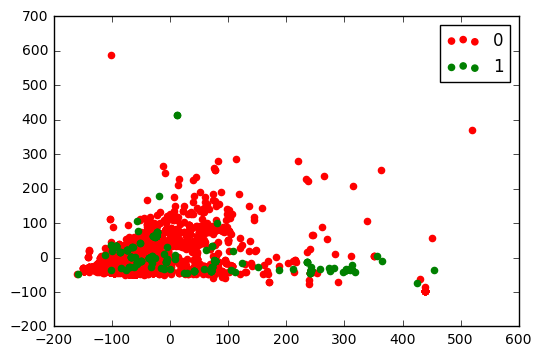

In [19]:
for cur_class, color in zip(classes,colors): 
    mask = (y == cur_class)
    plt.scatter(Xd[mask,0], Xd[mask,1], marker='o', color=color, label=int(cur_class))
plt.legend() 
plt.show()

In [20]:
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

In [42]:
class MeanDiscrete(TransformerMixin): 
    def fit(self, X, y=None): 
        X = as_float_array(X) 
        self.mean = X.mean(axis=0) 
        return self
    def transform(self, X, y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0] 
        return X > self.mean

In [43]:
X.mean(axis=0)

array([ 63.912, 155.632,   3.913, ...,   0.015,   0.01 ,   0.001])

In [44]:
mean_discrete = MeanDiscrete() 
X_mean = mean_discrete.fit_transform(X)

In [45]:
from numpy.testing import assert_array_equal

In [53]:
def test_meandiscrete():
    X_test = np.array([[ 0, 2],[ 3, 5], [ 6, 8], [ 9, 11], [12, 14], [15, 17], [18, 20], [21, 23], [24, 26], [27, 29]])
    mean_discrete = MeanDiscrete()
    mean_discrete.fit(X_test)
    assert_array_equal(mean_discrete.mean, np.array([13.5, 15.5]))
    X_transformed = mean_discrete.transform(X_test)
    X_expected = np.array([[ 0, 0], [ 0, 0],[ 0, 0], [ 0, 0], [ 0, 0], [ 1, 1], [ 1, 1], [ 1, 1], [ 1, 1],[ 1, 1]])
    assert_array_equal(X_transformed, X_expected)

In [54]:
test_meandiscrete()

In [56]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print("Mean Discrete performance: {0:.3f}".format(scores_mean_discrete.mean())) 

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Mean Discrete performance: 0.917
